## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [ ]:
import numpy as np
import sympy
from sympy import nsolve
from sympy.calculus.util import continuous_domain
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())


  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)


  def draw(this, caller, label=True, color=False, linestyle="solid"):
    if (label):
      if (color):
        this.ax.plot(this.X, caller(this.X), label=f"""$f(x) = {sympy.latex(caller(x))}$""", color=color, linestyle=linestyle)
      else:
        this.ax.plot(this.X, caller(this.X), label=f"""$f(x) = {sympy.latex(caller(x))}$""", linestyle=linestyle)
    else:
      if (color):
        this.ax.plot(this.X, caller(this.X), color=color, linestyle=linestyle)
      else:
        this.ax.plot(this.X, caller(this.X), linestyle=linestyle)

  def create_point(this, functions, bases, offset_x, offset_y):
    x_coords = []
    y_coords = []
    x = sympy.Symbol('x')
    for i, base in enumerate(bases):
      x_coords.append(nsolve(sympy.Eq(functions[0](x), functions[1](x)), x, base))
      y_coords.append(functions[1](x_coords[len(x_coords) - 1]))
    display(x_coords)
    display(y_coords)
    this.ax.scatter(x_coords, y_coords)
    for i, x_coord in enumerate(x_coords):
      this.ax.annotate(f"""A{i + 1}""", xy=(x_coord, y_coords[i]), xycoords='data', xytext=(x_coord + offset_x, y_coords[i] + offset_y), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

  def set_y(this, min, max):
    this.ax.set(ylim=(min, max))

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

[-0.815553418808961, 1.42961182472556]

[0, 0]

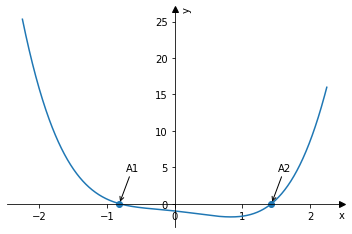

In [ ]:
def f(x):
 return (x ** 4 - sympy.E ** x)
def g(x):
  return(0)

picture = graph()
picture.set_x(-2.25, 2.25)
picture.draw(f, False, False)
picture.create_point([f, g], [-2, 2], 0.1, 4.5)

picture.normalize()

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

[1.30133323382849, 2.08594344788353, 2.50217038800416]

[0.263389303418972, 0.735221245896387, 0.917158510447058]

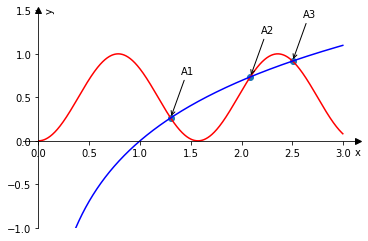

In [ ]:
def f(x):
  return(np.sin(2 * x) ** 2)
def g(x):
  return(np.log(x))
def sympy_f(x):
  return(sympy.sin(2 * x) ** 2)
def sympy_g(x):
  return(sympy.log(x))

picture = graph()
picture.set_x(0, 3)
picture.set_y(-1, 1.5)

picture.draw(f, False, "red")
picture.draw(g, False, "blue")
picture.create_point([sympy_f, sympy_g], [1.25, 2, 2.5], 0.1, 0.5)

picture.normalize()

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

[3.21863715818210, 3.38722138942523, 3.68072303274915, 3.81186570968780]

[0.75, 0.75, 0.75, 0.75]

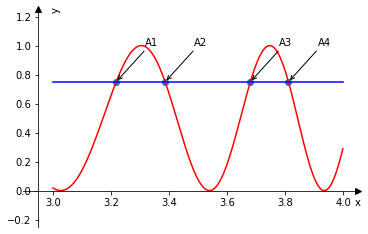

In [ ]:
def f(x):
  return(np.sin(2 * (x ** 2) - 7 * x + 6) ** 2)
def g(x):
  return(0.75 + x - x)
def sympy_f(x):
  return(sympy.sin(2 * (x ** 2) - 7 * x + 6) ** 2)
def sympy_g(x):
  return(0.75)

picture = graph()
picture.set_x(3, 4)
picture.set_y(-0.25, 1.25)

picture.draw(f, False, "red")
picture.draw(g, False, "blue")
picture.create_point([sympy_f, sympy_g], [3.0, 3.4, 3.5, 3.7], 0.1, 0.25)

picture.normalize()

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [ ]:
def f(x):
  return(sympy.tan(2 * (x ** 2) + 1) ** 4 - 10)
x = sympy.Symbol('x')
nsolve(sympy.Eq(f(x), 0), x, [0, 0.2], solver='bisect', verify=False)

0.171066377483446

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [ ]:
x, y, z = sympy.symbols('x y z')
Eqs = [
        sympy.Eq((x - 1) ** 2 + (y - 2) ** 2 + (z + 3) ** 2, 25),
        sympy.Eq(x + y + z, 0),
        sympy.Eq(-2 * x + 3 * y - z, 7)
]
solution = nsolve(Eqs, (x, y, z), (0, 0, 0))
display(solution)
Eqs = [
       sympy.Eq(Eqs[0].lhs.subs({x: solution[0], y: solution[1], z: solution[2]}), Eqs[0].rhs.subs({x: solution[0], y: solution[1], z: solution[2]}), evaluate=False),
       sympy.Eq(Eqs[1].lhs.subs({x: solution[0], y: solution[1], z: solution[2]}), Eqs[1].rhs.subs({x: solution[0], y: solution[1], z: solution[2]}), evaluate=False),
       sympy.Eq(Eqs[2].lhs.subs({x: solution[0], y: solution[1], z: solution[2]}), Eqs[2].rhs.subs({x: solution[0], y: solution[1], z: solution[2]}), evaluate=False),
]
display(*Eqs)

Matrix([
[-2.08606699924184],
[ 1.22848325018954],
[0.857583749052298]])

Eq(25.0, 25)

Eq(-2.22044604925031e-16, 0)

Eq(7.0, 7)

### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

 Вариант 2
\begin{align*}
 f(x) = \frac{x^{2}}{8} + \frac{x}{2} - \frac{7}{2}\\
 g(x) = \frac{3 x^{2}}{8} - \frac{x}{2} - \frac{13}{2}
\end{align*}

[-2.00000000000000, 6.00000000000000]

[-4.00000000000000, 4.00000000000000]

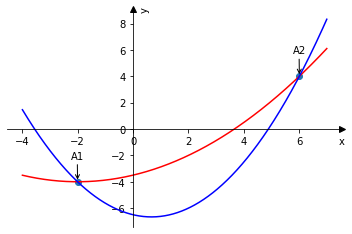

In [ ]:
def f(x):
  return((x ** 2) / 8 + x / 2 - 7 / 2)
def g(x):
  return(3 * (x ** 2) / 8 - x / 2 - 13 / 2)

picture = graph()
picture.set_x(-4, 7)

picture.draw(f, False, "red")
picture.draw(g, False, "blue")
#picture.create_point([sympy_f, sympy_g], [3.0, 3.4, 3.5, 3.7], 0.1, 0.25)
picture.create_point([f, g], [0, 4], -0.25, 1.75)

picture.normalize()